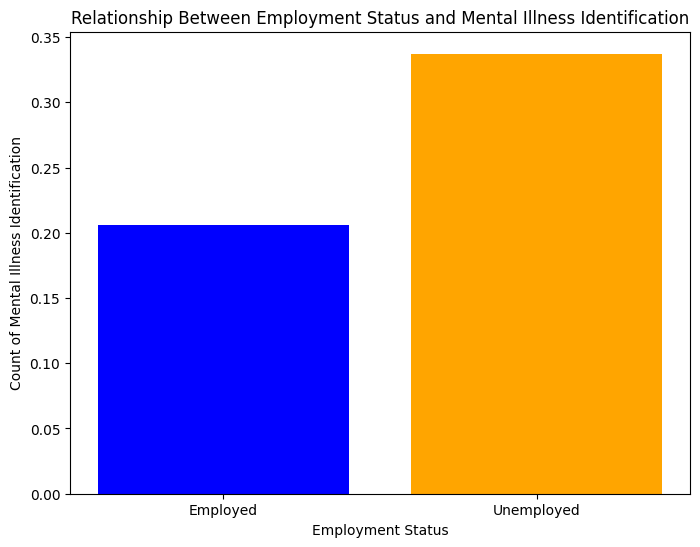

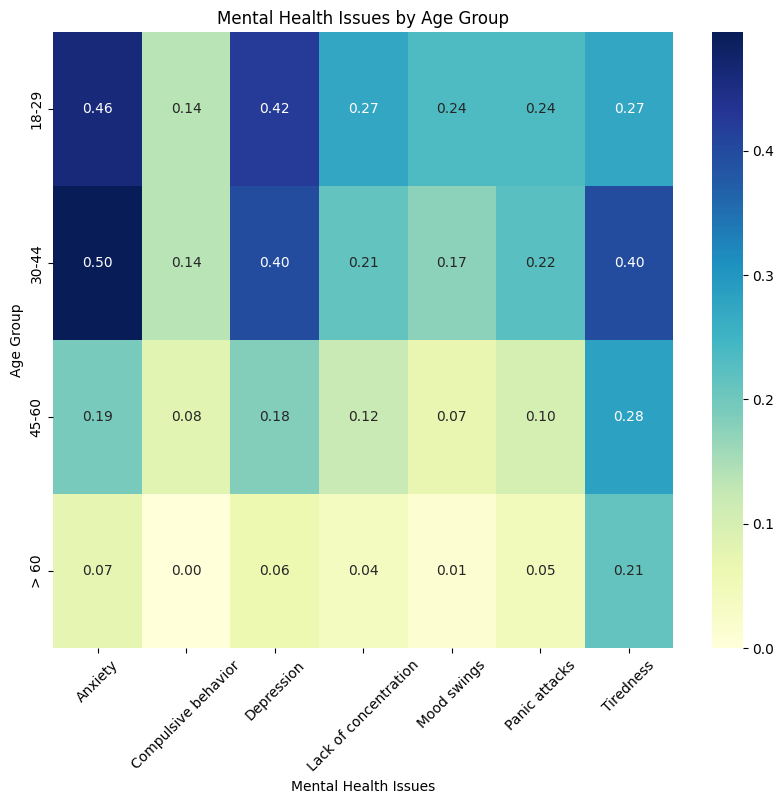

        Anxiety  Compulsive behavior  Depression  Lack of concentration  \
Age                                                                       
18-29  0.461538             0.137255    0.423077               0.274510   
30-44  0.495146             0.135922    0.398058               0.213592   
45-60  0.191919             0.080808    0.181818               0.121212   
> 60   0.075000             0.000000    0.062500               0.037500   

       Mood swings  Panic attacks  Tiredness  
Age                                           
18-29     0.235294       0.235294   0.274510  
30-44     0.174757       0.223301   0.398058  
45-60     0.070707       0.101010   0.282828  
> 60      0.012500       0.050000   0.212500  


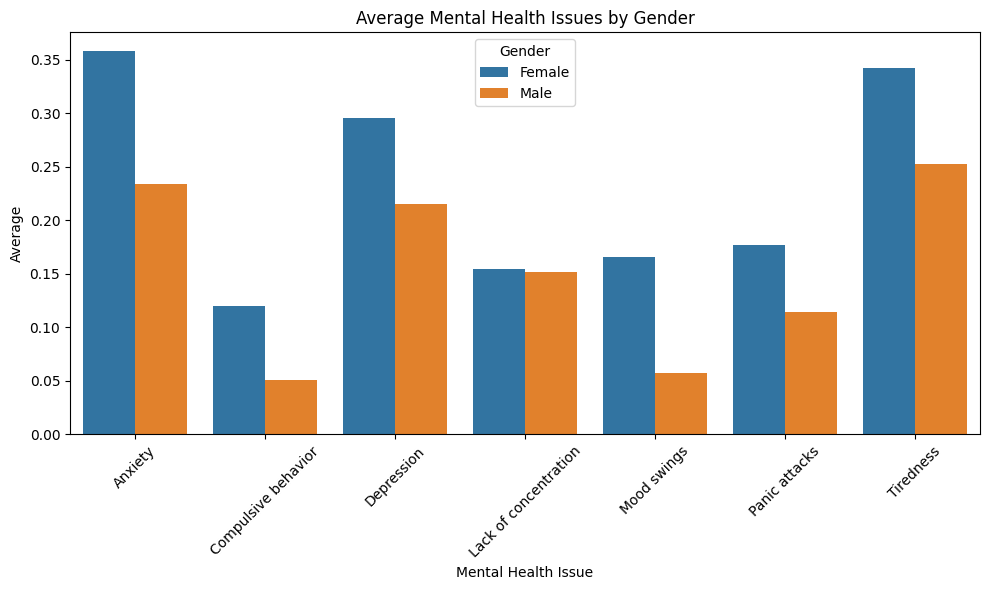

   Gender   Anxiety  Compulsive behavior  Depression  Lack of concentration  \
0  Female  0.357955             0.120000    0.295455               0.154286   
1    Male  0.234177             0.050633    0.215190               0.151899   

   Mood swings  Panic attacks  Tiredness  
0     0.165714       0.177143   0.342857  
1     0.056962       0.113924   0.253165  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

file_path = 'C:/Users/User/Desktop/Python/STAT101A/Data_Raw.csv'
df_clean = pd.read_csv(file_path)

import pandas as pd

def clean_data(df):
    # Replace gaps back from the next valid value in: 'I am currently employed at least part-time', 'I identify as having a mental illness' and 16 other columns
    df = df.fillna({'I am currently employed at least part-time': df['I am currently employed at least part-time'].bfill(), 'I identify as having a mental illness': df['I identify as having a mental illness'].bfill(), 'I have my own computer separate from a smart phone': df['I have my own computer separate from a smart phone'].bfill(), 'I have been hospitalized before for my mental illness': df['I have been hospitalized before for my mental illness'].bfill(), 'I am legally disabled': df['I am legally disabled'].bfill(), 'I have my regular access to the internet': df['I have my regular access to the internet'].bfill(), 'I live with my parents': df['I live with my parents'].bfill(), 'I have a gap in my resume': df['I have a gap in my resume'].bfill(), 'Total length of any gaps in my resume in\xa0months.': df['Total length of any gaps in my resume in\xa0months.'].bfill(), 'Annual income (including any social welfare programs) in USD': df['Annual income (including any social welfare programs) in USD'].bfill(), 'I am unemployed': df['I am unemployed'].bfill(), 'I read outside of work and school': df['I read outside of work and school'].bfill(), 'Annual income from social welfare programs': df['Annual income from social welfare programs'].bfill(), 'I receive food stamps': df['I receive food stamps'].bfill(), 'I am on section 8 housing': df['I am on section 8 housing'].bfill(), 'How many times were you hospitalized for your mental illness': df['How many times were you hospitalized for your mental illness'].bfill(), 'Anxiety': df['Anxiety'].bfill(), 'Depression': df['Depression'].bfill()})
    return df

# Loaded variable 'df' from URI: c:\Users\User\Desktop\Python\STAT101A\Cleaned_Data.csv
df = pd.read_csv(r'c:\Users\User\Desktop\Python\STAT101A\Data_Raw.csv')

df_clean = clean_data(df.copy())

# Correct use of pivot_table to aggregate df_clean
# Here, we're assuming 'I am unemployed' and 'I identify as having a mental illness' are binary (0 or 1) for simplicity.
# Adjust the 'aggfunc' as needed, e.g., 'mean' could be used to find the proportion of individuals identifying as having a mental illness within each employment status group.
relationOfUnemploymentToMentalHealth = df_clean.pivot_table(index='I am unemployed', values='I identify as having a mental illness', aggfunc='mean')

# Resetting index to make 'I am unemployed' a column again for easier plotting
relationOfUnemploymentToMentalHealth.reset_index(inplace=True)

# Renaming columns for clarity in the plot
relationOfUnemploymentToMentalHealth.columns = ['Unemployed', 'Count of Mental Illness Identification']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(relationOfUnemploymentToMentalHealth['Unemployed'], relationOfUnemploymentToMentalHealth['Count of Mental Illness Identification'], color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Employed', 'Unemployed'])
plt.ylabel("Count of Mental Illness Identification")
plt.xlabel("Employment Status")
plt.title("Relationship Between Employment Status and Mental Illness Identification")
plt.show()


# Create the pivot table
pivot_table = pd.pivot_table(df_clean, values=['Mood swings', 'Panic attacks', 'Compulsive behavior', 'Depression', 'Anxiety', 'Lack of concentration', 'Tiredness'], 
                             index='Age', aggfunc='mean')



# Visualize the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Mental Health Issues by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Mental Health Issues')
plt.xticks(rotation=45)
plt.show()
# Display the pivot table
print(pivot_table)

# Filter df_clean for 'Gender' to include only 'Male' or 'Female'
filtered_data = df_clean[df_clean['Gender'].isin(['Male', 'Female'])]
pivot_table_gender = pd.pivot_table(filtered_data, 
                                        values=['Mood swings', 'Panic attacks', 'Compulsive behavior', 'Depression', 'Anxiety', 'Lack of concentration', 'Tiredness'],
                                        index=['Gender'], 
                                        aggfunc='mean').reset_index()

# Melt the pivot table for easier plotting with seaborn
melted_pivot_table = pivot_table_gender.melt(id_vars="Gender", var_name="Mental Health Issue", value_name="Average")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Mental Health Issue', y='Average', hue='Gender', data=melted_pivot_table)
plt.title('Average Mental Health Issues by Gender')
plt.xticks(rotation=45)
plt.ylabel('Average')
plt.xlabel('Mental Health Issue')
plt.tight_layout()
plt.show()

# Display the pivot table
print(pivot_table_gender)


In [ ]:
print("Hellow World")

In [6]:
file_path = 'C:/Users/User/Desktop/Python/STAT101A/Data_Raw.csv'
data = pd.read_csv(file_path)

data.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

         Mean Age
count  333.000000
mean    45.771772
std     13.256126
min     24.000000
25%     37.000000
50%     53.000000
75%     53.000000
max     62.000000
Gender
Female    175
Male      158
Name: count, dtype: int64
Education
Completed Undergraduate    100
Some Undergraduate          81
High School or GED          63
Completed Masters           49
Some Masters                12
Completed Phd               10
Some highschool             10
Some Phd                     8
Name: count, dtype: int64
I am currently employed at least part-time   0    1
I identify as having a mental illness              
0                                           77  177
1                                           30   49


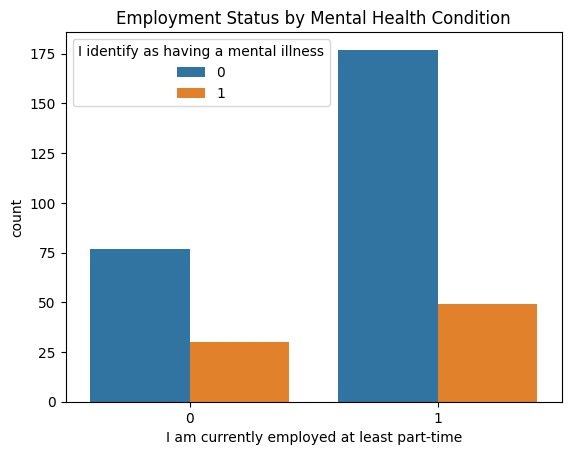

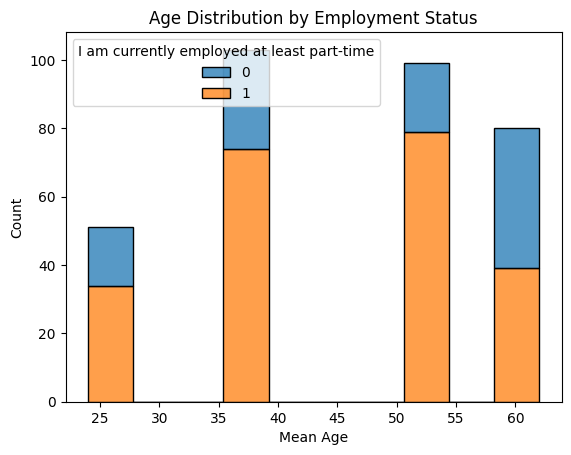

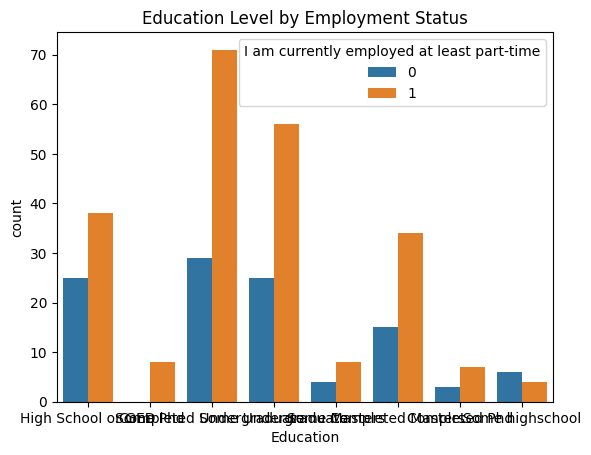

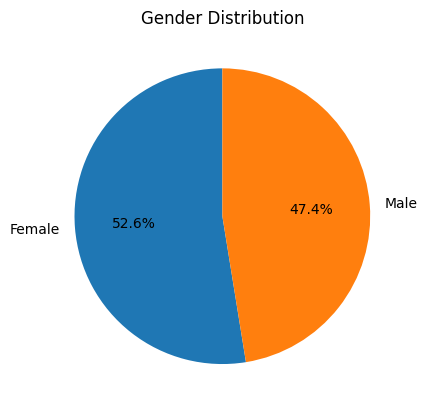

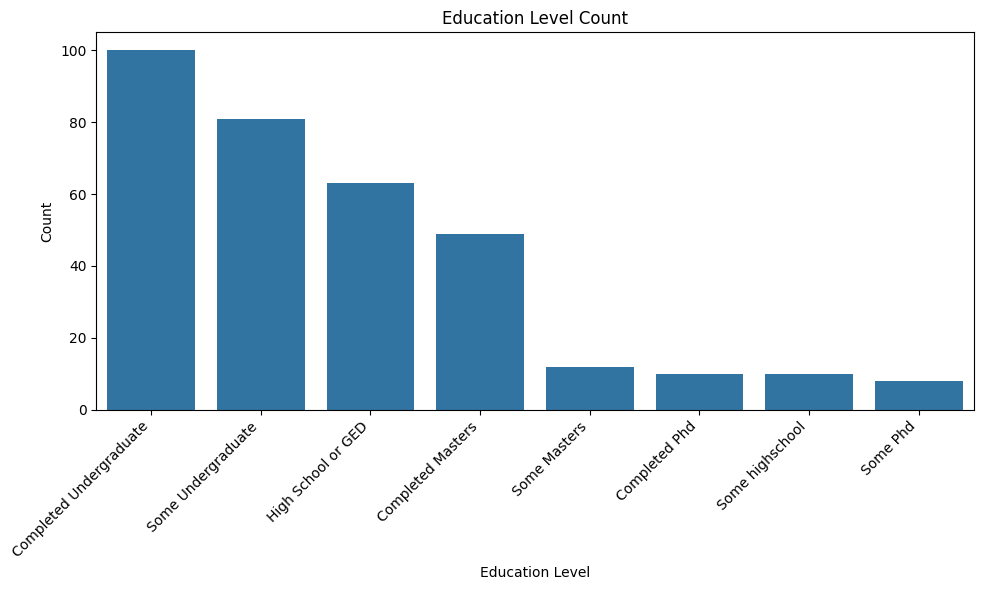

  Statistic       Value
0     count  333.000000
1      mean   45.771772
2       std   13.256126
3       min   24.000000
4       25%   37.000000
5       50%   53.000000
6       75%   53.000000
7       max   62.000000


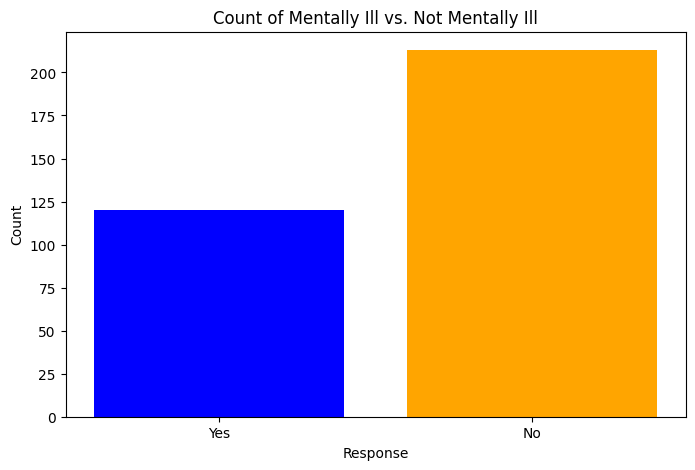

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/User/Desktop/Python/STAT101A/Data_Clean.csv')

# Descriptive statistics for demographic variables
demographics = data[['Mean Age', 'Gender', 'Education', 'Household Income']]
print(demographics.describe())
print(demographics['Gender'].value_counts())
print(demographics['Education'].value_counts())

# Cross-tabulation of mental health condition and employment status
cross_tab = pd.crosstab(data['I identify as having a mental illness'], data['I am currently employed at least part-time'])
print(cross_tab)

# Visualization
sns.countplot(data=data, x='I am currently employed at least part-time', hue='I identify as having a mental illness')
plt.title('Employment Status by Mental Health Condition')
plt.show()

# Histogram of age distribution
sns.histplot(data=data, x='Mean Age', hue='I am currently employed at least part-time', multiple='stack')
plt.title('Age Distribution by Employment Status')
plt.show()

# Bar chart of education level by employment status
sns.countplot(data=data, x='Education', hue='I am currently employed at least part-time')
plt.title('Education Level by Employment Status')
plt.show()

# Pie chart of gender distribution
gender_counts = data['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


# Data
education_data = {
    'Education Level': [
        'Completed Undergraduate', 'Some Undergraduate', 'High School or GED',
        'Completed Masters', 'Some Masters', 'Completed Phd',
        'Some highschool', 'Some Phd'
    ],
    'Count': [100, 81, 63, 49, 12, 10, 10, 8]
}

# Create DataFrame
education_df = pd.DataFrame(education_data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=education_df, x='Education Level', y='Count')
plt.title('Education Level Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Descriptive statistics for Mean Age
mean_age_stats = {
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Value': [333, 45.771772, 13.256126, 24, 37, 53, 53, 62]
}

# Create DataFrame
mean_age_df = pd.DataFrame(mean_age_stats)

# Display the table
print(mean_age_df)

# Data
mental_illness_data = {
    'Response': ['Yes', 'No'],
    'Count': [120, 213]  # Example counts, replace with actual data
}

# Create DataFrame
mental_illness_df = pd.DataFrame(mental_illness_data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(mental_illness_df['Response'], mental_illness_df['Count'], color=['blue', 'orange'])
plt.title('Count of Mentally Ill vs. Not Mentally Ill')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()